# Import Libraries for analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

#Light GBM
import lightgbm as lgb


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

PATH = '/media/maria/2TB Monster driv/PrecisionFDA/'


# Import Databases

In [2]:
train = pd.read_csv(PATH + 'Descriptive/train.csv')
test = pd.read_csv(PATH + 'Descriptive/test.csv')

In [3]:
train.head()

,Id,DRIVERS,PASSPORT,MARITAL,RACE,ETHNICITY,GENDER,COUNTY,LAT,LON,...,Suspected lung cancer (situation),Third degree burn_y.1,Tubal pregnancy,COVID_Status,Death,Days_hospitalized,Hospitalized,Ventilator,Days_ICU,ICU
0,93fa6213-73a1-4cce-b408-9986a4145801,0,0,NaN,white,nonhispanic,M,Middlesex County,42.398277,-71.289383,...,0.0,0.0,0.0,0,0.0,NaN,0.0,0.0,NaN,0.0
1,53bbfa41-5cab-422e-a8a7-8fa3ae55ed71,1,1,NaN,asian,hispanic,M,Middlesex County,42.691016,-71.275475,...,NaN,NaN,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0
2,30fb496e-b8d3-4d36-8e50-86acb3d1a223,1,1,M,white,nonhispanic,M,Hampden County,42.174484,-72.784777,...,NaN,NaN,NaN,0,0.0,NaN,0.0,0.0,NaN,0.0
3,afa2680f-7f73-46d9-b0cd-2cf3db49724b,1,1,M,white,nonhispanic,F,Middlesex County,42.460402,-71.113293,...,NaN,NaN,NaN,1,0.0,NaN,0.0,0.0,NaN,0.0
4,26e5d262-6cdc-4274-a5cd-d7fd439e35f9,1,1,S,white,nonhispanic,M,Middlesex County,42.338808,-71.341510,...,NaN,NaN,NaN,1,0.0,17.303472,1.0,0.0,NaN,0.0


In [4]:
#Display all database


def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
train['Death Certification'].value_counts()

0.0    91144
1.0    25217
Name: Death Certification, dtype: int64

In [6]:
test['Death Certification'].value_counts()

0.0    22823
1.0     6306
Name: Death Certification, dtype: int64

In [7]:
#train['Death Certification'] * train['COVID_Staus']


pd.pivot_table(train, values='Death Certification', 
               columns=['COVID_Status'], aggfunc=np.sum)

COVID_Status,0,1
Death Certification,25217.0,0.0


In [8]:
display_all(train.describe())

DRIVERS       PASSPORT            LAT            LON  \
count  117959.000000  117959.000000  117959.000000  117959.000000   
mean        0.984935       0.981850      42.277738     -71.359432   
std         0.121810       0.133496       0.280501       0.596897   
min         0.000000       0.000000      41.241591     -73.490615   
25%         1.000000       1.000000      42.127746     -71.547992   
50%         1.000000       1.000000      42.317212     -71.154750   
75%         1.000000       1.000000      42.456261     -71.024435   
max         1.000000       1.000000      42.901078     -69.921561   

       HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE            Age  \
count         1.179590e+05         1.179590e+05  117959.000000   
mean          1.023666e+06         3.471099e+04      55.384600   
std           5.461491e+05         8.334722e+04      18.783242   
min           5.166400e+02         0.000000e+00       0.000000   
25%           6.093919e+05         5.097815e+03      40.000000   
50%           1.168081e+06         9.236690e+03      59.000000   
75%           1.467964e+06         1.819100e+04      71.000000   
max           3.203008e+06         1.557373e+06      84.000000   

       Allergy to bee venom  Allergy to dairy product  Allergy to eggs  \
count          10896.000000              10896.000000     10896.000000   
mean               0.172540                  0.038179         0.049284   
std                0.377867                  0.191637         0.216471   
min                0.000000                  0.000000         0.000000   
25%                0.000000                  0.000000         0.000000   
50%                0.000000                  0.000000         0.000000   
75%                0.000000                  0.000000         0.000000   
max                1.000000                  1.000000         1.000000   

       Allergy to fish  Allergy to grass pollen  Allergy to mould  \
count     10896.000000             10896.000000      10896.000000   
mean          0.167676                 0.254589          0.363803   
std           0.373596                 0.435650          0.481115   
min           0.000000                 0.000000          0.000000   
25%           0.000000                 0.000000          0.000000   
50%           0.000000                 0.000000          0.000000   
75%           0.000000                 1.000000          1.000000   
max           1.000000                 1.000000          1.000000   

       Allergy to nut  Allergy to peanuts  Allergy to soya  \
count    10896.000000        10896.000000     10896.000000   
mean         0.169787            0.188418         0.016887   
std          0.375463            0.391063         0.128854   
min          0.000000            0.000000         0.000000   
25%          0.000000            0.000000         0.000000   
50%          0.000000            0.000000         0.000000   
75%          0.000000            0.000000         0.000000   
max          1.000000            1.000000         1.000000   

       Allergy to tree pollen  Allergy to wheat  Dander (animal) allergy  \
count            10896.000000      10896.000000             10896.000000   
mean                 0.251836          0.045338                 0.334526   
std                  0.434087          0.208053                 0.471846   
min                  0.000000          0.000000                 0.000000   
25%                  0.000000          0.000000                 0.000000   
50%                  0.000000          0.000000                 0.000000   
75%                  1.000000          0.000000                 1.000000   
max                  1.000000          1.000000                 1.000000   

       House dust mite allergy  Latex allergy  Shellfish allergy  \
count             10896.000000   10896.000000        10896.00000   
mean                  0.248807       0.068741            0.32801   
std                   0.432342       0.253024            0.

In [9]:
#save oof
oof_df = train[["Id", "COVID_Status"]]

In [10]:
train = train.loc[train['Death Certification']!=1]

In [11]:
train.shape

(92742, 945)

In [12]:
train['COVID_Status'].value_counts()

1    73697
0    19045
Name: COVID_Status, dtype: int64

# Hyperparameters

In [13]:
seed = 42
#Using the parameters from ICU mortality 

param = {'num_leaves': 15, 
        'boosting_type': 'gbdt',
        'learning_rate': 0.01,
        'colsample_bytree': 0.6189140385454879,
        'subsample': 0.7098267979279573,
        'reg_alpha': 5, 
        'reg_lambda': 1, 
        'scale_pos_weight': 1,
        'save_binary': True,
        'seed': seed,
        'feature_fraction_seed': seed,
        'bagging_seed': seed,
        'drop_seed': seed,
        'data_random_seed': seed,
        'objective': 'binary',  
        'verbose': 1,
        'metric': {'binary_logloss', 'auc'},
        'is_unbalance': False, 
        'boost_from_average': True,
        'extra_trees': True
    }

In [14]:
train.drop(columns=['Death', 'Hospitalized', 'Ventilator', 'ICU', 
                    'Id', 'Days_hospitalized', 'Days_ICU'], inplace=True)  

In [15]:
test.drop(columns=['Id'], inplace=True)

In [16]:
predictors_int = list(train.columns)

In [17]:
cat_names = ['DRIVERS' , 'PASSPORT', 'MARITAL', 'RACE', 'ETHNICITY',
             'GENDER', 'COUNTY',  'PLACE_BIRTH']

In [18]:
predictors_int.remove('DRIVERS')
predictors_int.remove('PASSPORT')
predictors_int.remove('MARITAL')
predictors_int.remove('RACE')
predictors_int.remove('ETHNICITY')
predictors_int.remove('GENDER')
predictors_int.remove('COUNTY')
predictors_int.remove('PLACE_BIRTH')

# Creation of Dummies and missing values handling

In [19]:
train['is_train'] = 1
test['is_train'] = 0
train_test= pd.concat([train,test], axis = 0, sort=False)

In [20]:
#one-hot encoding of categorical variables
train_test = pd.get_dummies(train_test, columns = cat_names, dummy_na=True)

In [21]:
train = train_test.loc[train_test.is_train==1]

In [22]:
train = train.drop(columns=['is_train'])

In [23]:
test = train_test.loc[train_test.is_train==0]

In [24]:
test = test.drop(columns=['is_train'])

In [25]:
del train_test

In [26]:
predictors = list(train.columns)
predictors.remove('COVID_Status')
predictors.remove('Death Certification')

In [27]:
#predictors.remove('Oxygen saturation in Arterial blood')
#predictors.remove('Body temperature')
#predictors.remove('Respiratory rate')
#predictors.remove('Heart rate')

# Training Loop

In [28]:
from sklearn.model_selection import KFold
nfold = 5
target = 'COVID_Status'
skf = KFold(n_splits=nfold, shuffle=True, random_state=2019)

oof = np.zeros(len(train))
predictions = np.zeros(len(test))

In [29]:

i = 1

for train_index, valid_index in skf.split(train, train.COVID_Status.values):
    print("\nfold {}".format(i))
    
    #Train data
    t=train.iloc[train_index]
        
    xg_train = lgb.Dataset(t[predictors].values,
                           label=t[target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )
    
    xg_valid = lgb.Dataset(train.iloc[valid_index][predictors].values,
                           label=train.iloc[valid_index][target].values,
                           feature_name=predictors,
                           free_raw_data = False
                           )   

    num_rounds = 50000
    clf = lgb.train(param, xg_train, num_rounds, valid_sets = [xg_train, xg_valid], 
                    verbose_eval=2000, early_stopping_rounds = 100)  #1000
    oof[valid_index] = clf.predict(train.iloc[valid_index][predictors].values, num_iteration=clf.best_iteration) 
    #save models
    clf.save_model('lgb_classifier_fold{}.txt'.format(i), num_iteration=clf.best_iteration) 
    #to read model model = lgb.Booster(model_file='lgb_classifier.txt')
    predictions += clf.predict(test[predictors], num_iteration=clf.best_iteration) / nfold
    i = i + 1



fold 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	training's binary_logloss: 0.496312	training's auc: 0.71812	valid_1's binary_logloss: 0.495966	valid_1's auc: 0.706094

fold 2
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	training's binary_logloss: 0.40721	training's auc: 0.727954	valid_1's binary_logloss: 0.409708	valid_1's auc: 0.708529

fold 3
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[13]	training's binary_logloss: 0.475571	training's auc: 0.720499	valid_1's binary_logloss: 0.478161	valid_1's auc: 0.705499

fold 4
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[85]	training's binary_logloss: 0.410028	training's auc: 0.726055	valid_1's binary_logloss: 0.4112	valid_1's auc: 0.716391

fold 5
Training until validation scores don't improve for 100 rounds.
Early stop

In [30]:
print("\n\nCV AUC: {:<0.5f}".format(metrics.roc_auc_score(train.COVID_Status.values.astype(bool), oof)))
print("\n\nCV log loss: {:<0.5f}".format(metrics.log_loss(train.COVID_Status.values.astype(bool), oof)))
print("\n\nCV Gini: {:<0.5f}".format(2 * metrics.roc_auc_score(train.COVID_Status.values.astype(bool), oof) -1))




CV AUC: 0.69201


CV log loss: 0.44313


CV Gini: 0.38403


Optimizing the probability threshold to decide COVID Y/N to maximize F1 score in the COVID positive class

In [31]:
maximum = 0
for i in range(1000):
    f1 = metrics.f1_score(train.COVID_Status.values.astype(bool), oof >i*.001)
    if f1 > maximum:
        maximum=f1
        threshold =  i*0.001

print(f'Maximum f1 value: {maximum}' , f'Probability cutoff: {threshold}' )

Maximum f1 value: 0.9233007091220304 Probability cutoff: 0.777


In [32]:
print(metrics.classification_report(train.COVID_Status.values.astype(bool), oof >threshold))

              precision    recall  f1-score   support

       False       0.99      0.36      0.53     19045
        True       0.86      1.00      0.92     73697

    accuracy                           0.87     92742
   macro avg       0.92      0.68      0.73     92742
weighted avg       0.89      0.87      0.84     92742



# Export results

In [33]:
sub_df = pd.read_csv(PATH + 'Descriptive/test.csv')
sub_df["COVID_Status"] = predictions

#If death all probabilities 0
sub_df["COVID_Status"][sub_df['Death Certification'] == 1] = 0

/home/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [34]:
pd.pivot_table(sub_df, values='COVID_Status', 
               columns=['Death Certification'], aggfunc=np.mean)

Death Certification,0.0,1.0
COVID_Status,0.794324,0.0


In [35]:
sub_df[['Id', 'COVID_Status']].to_csv("lightgbm_Covid_status.csv", index=False, line_terminator='\n', header=False)

In [36]:
np.mean(predictions)

0.7879384718941147

# No COVID

In [37]:
pd.DataFrame(sub_df['Id']).loc[sub_df["COVID_Status"]<threshold].to_csv("no_covid_predicted.csv", index=False)

# Explainability

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [39]:
fpr_rf, tpr_rf, _ = roc_curve(train.COVID_Status.values.astype(bool), oof)

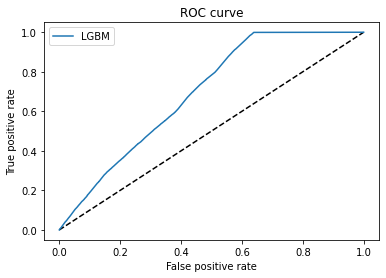

In [40]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='LGBM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [41]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(train.COVID_Status.values.astype(bool), oof)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.87


In [42]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline

In [43]:
import seaborn as sns

In [44]:
imp_df = pd.DataFrame()
imp_df['feature'] = predictors
imp_df['gain']  = clf.feature_importance(importance_type='gain')
imp_df['split'] = clf.feature_importance(importance_type='split')

In [45]:
def plot_importances(importances_):
    mean_gain = importances_[['gain', 'feature']].groupby('feature').mean()
    importances_['mean_gain'] = importances_['feature'].map(mean_gain['gain'])
    plt.figure(figsize=(18, 44))
    data_imp = importances_.sort_values('mean_gain', ascending=False)
    sns.barplot(x='gain', y='feature', data=data_imp[:300])
    plt.tight_layout()
    plt.savefig('importances.png')
    plt.show()

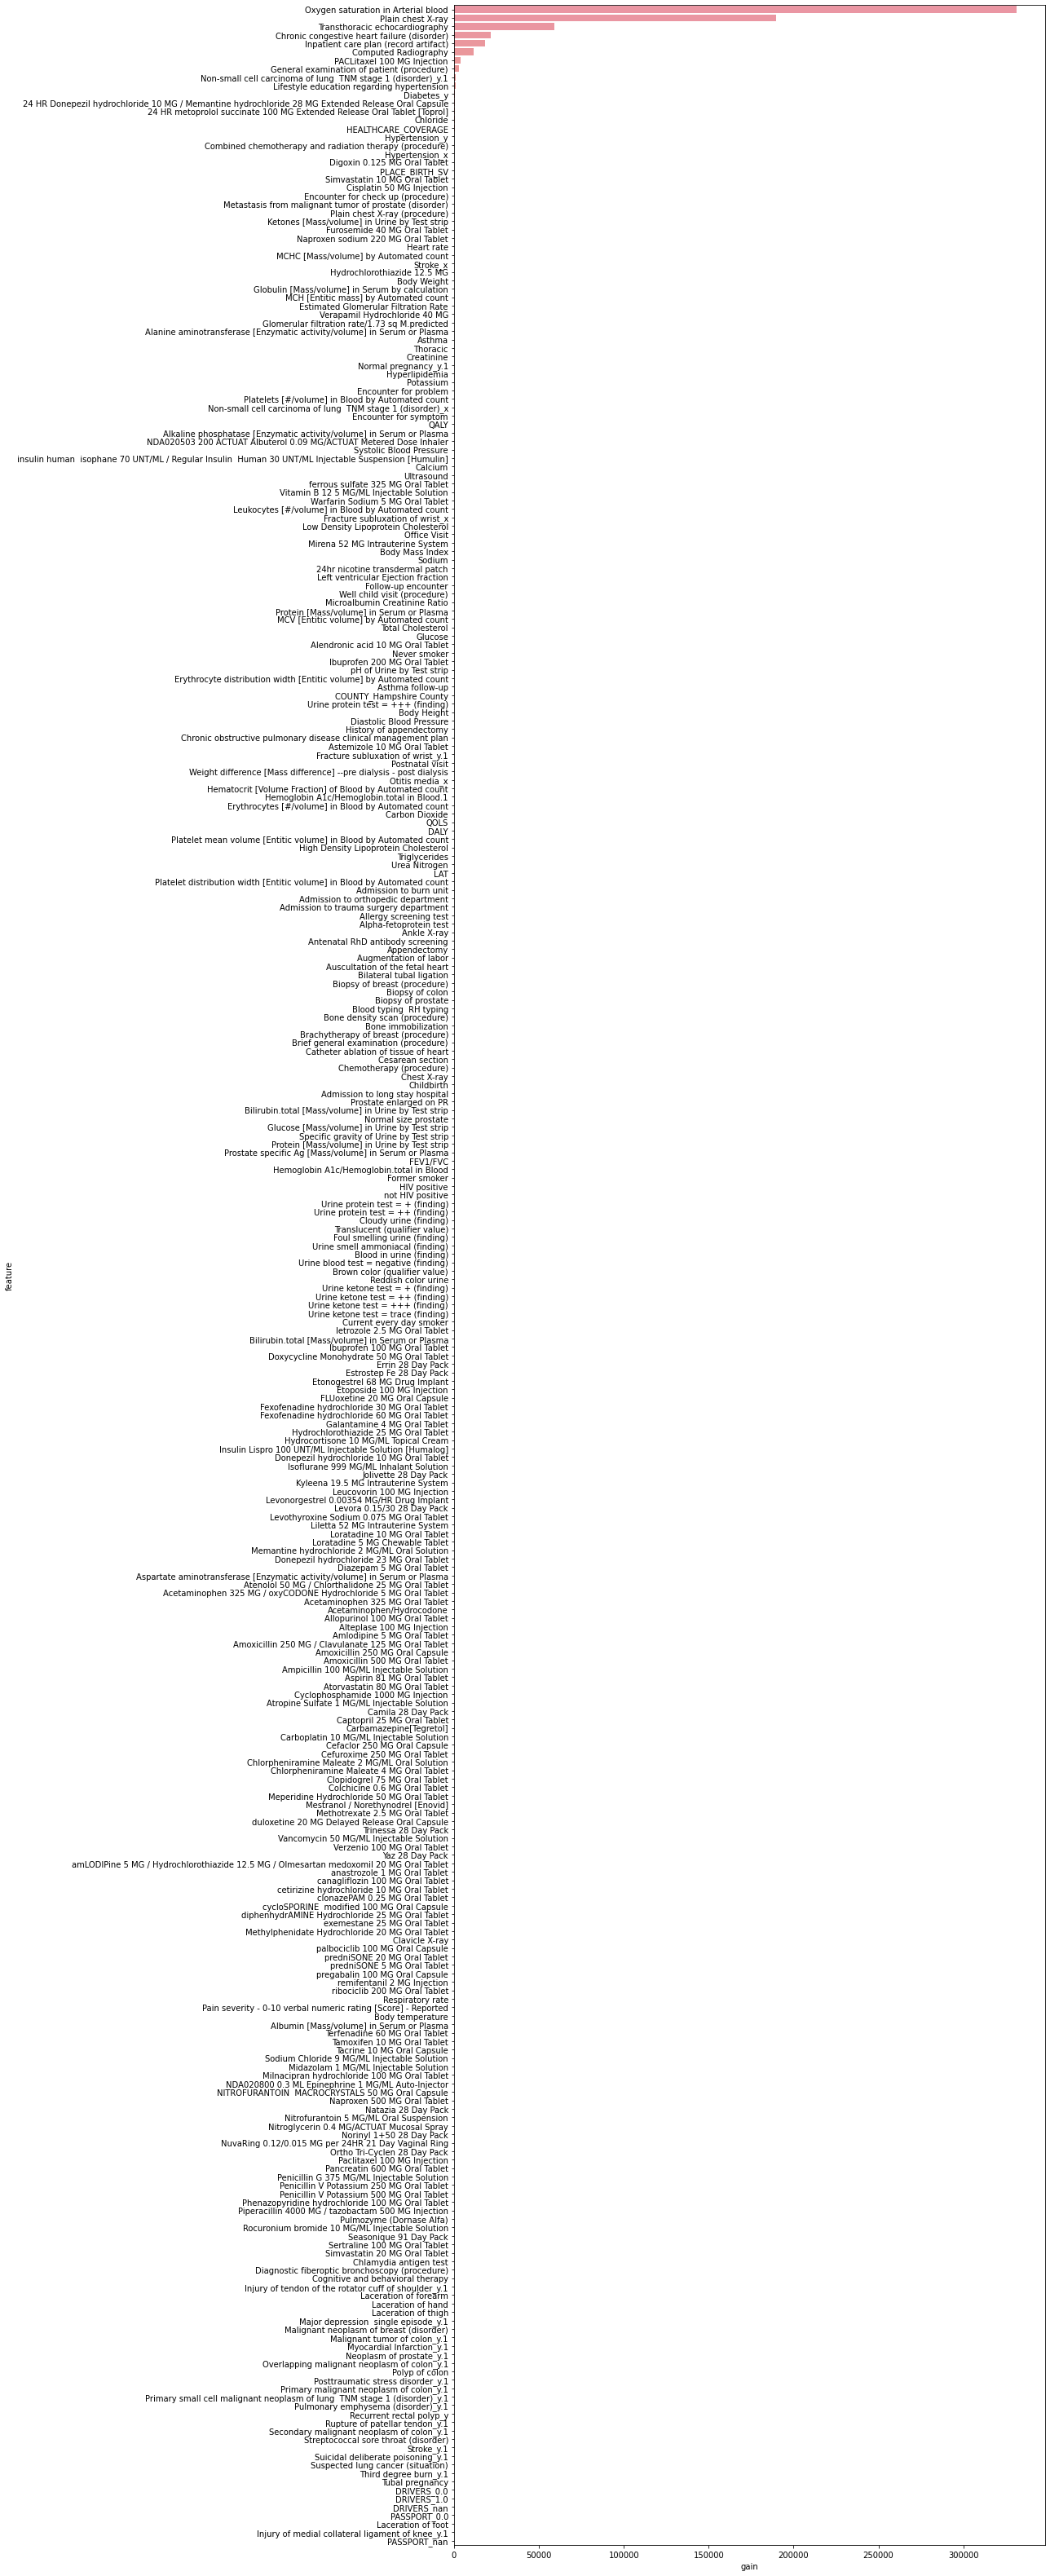

In [46]:
plot_importances(imp_df)

In [47]:
import shap

explainer   =  shap.TreeExplainer(clf)
shap_values = explainer.shap_values(t[predictors])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


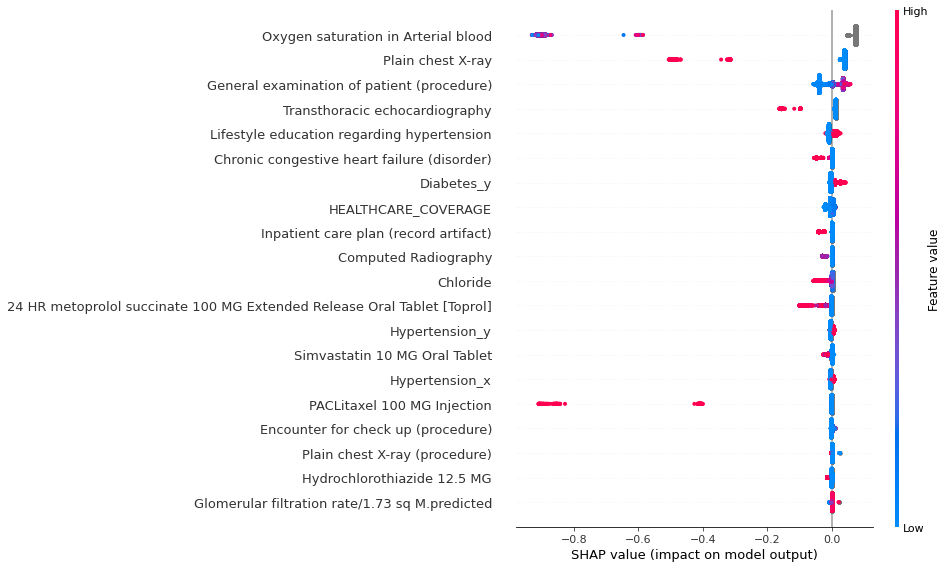

In [48]:
shap.summary_plot(shap_values[1], t[predictors])

In [49]:
#!pip install -U matplotlib

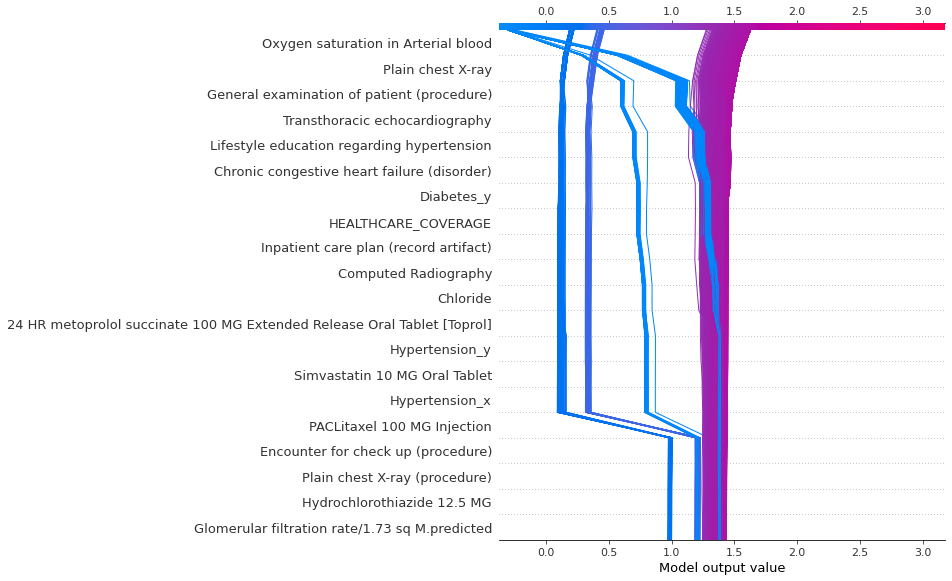

In [50]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], predictors, ignore_warnings=True,
                  legend_labels=None)